In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import scipy


import util_diagnostic
import util_visualization
import util_preprocessing
import util_calculation
import util_modelling

def reload():
    importlib.reload(util_diagnostic)
    importlib.reload(util_visualization)
    importlib.reload(util_preprocessing)
    importlib.reload(util_calculation)
    importlib.reload(util_modelling)

pd.set_option('display.max_columns', None)

file_name = "Data - Final.csv"
file_name_test="Data - Test.csv"
# datatype={'Nama':object,'Gender':object,'Bahasa':float,'Inggris':float,'TIK':float,'Matematika':float,'Fisika':float,'Kimia':float,'Geografi':float,'Sosiologi':float,'Antropologi':float,'Tgl_Daftar_Kuliah':object,'Lama_Kuliah':object}
df = pd.read_csv(file_name,delimiter=';')
df_test=pd.read_csv(file_name_test,delimiter=';')
df=df.iloc[:,1:]
columns = df.columns
test_columns=df_test.columns
display(df.head())
df.shape

,Gender,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,Extra_Kurikuler,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas
0,Pria,"69,8","64,6",64,"81,5","88,2","86,7","68,3",74,"67,7","70,7",Ekskul_4,Kos,Belum,Beasiswa,2008,Tangerang,UKM_3,Ya,"3,5",DKV
1,Wanita,"68,7","88,3","80,9","80,7","67,8","67,3","72,1","77,3","64,4","62,8",Ekskul_4,NaN,Belum,NaN,2009,Bekasi,UKM_2,Tidak,4,FIKOM
2,Wanita,"83,8","79,8","79,2","66,3","82,3","82,7","74,2",84,"75,4","65,9",Ekskul_1,NaN,Bekerja,Beasiswa,2008,Serang,UKM_4,Tidak,"4,5",FIKOM
3,Wanita,"66,7","63,7",64,"60,2","75,9","87,6","85,6","68,1","73,7","61,7",Ekskul_4,Orang Tua,Belum,Beasiswa,2009,Serang,UKM_1,Tidak,"5,5",DKV
4,Wanita,"62,3","76,8",77,"87,1","65,1","65,7","70,8",67,"77,3",79,Ekskul_2,Orang Tua,Bekerja,NaN,2009,Bekasi,Tidak,Ya,"6,5",DKV


(11499, 21)

## Change Data Type

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11499 entries, 0 to 11498
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             11499 non-null  object
 1   Bahasa             11499 non-null  object
 2   Inggris            11499 non-null  object
 3   TIK                10973 non-null  object
 4   Matematika         11499 non-null  object
 5   Fisika             11499 non-null  object
 6   Kimia              11499 non-null  object
 7   Biologi            11499 non-null  object
 8   Geografi           11499 non-null  object
 9   Sosiologi          10928 non-null  object
 10  Antropologi        10823 non-null  object
 11  Extra_Kurikuler    11499 non-null  object
 12  Tinggal_Dengan     7517 non-null   object
 13  Status_Kerja       11499 non-null  object
 14  Biaya              7720 non-null   object
 15  Tgl_Daftar_Kuliah  11499 non-null  int64 
 16  Alamat             11499 non-null  objec

In [3]:
num_col=['Bahasa','Inggris','TIK','Matematika','Fisika','Kimia','Biologi','Geografi','Sosiologi','Antropologi']
df=util_preprocessing.changeToFloatNums(df,num_col,np.nan)
df['Tgl_Daftar_Kuliah']=df['Tgl_Daftar_Kuliah'].astype(object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11499 entries, 0 to 11498
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             11499 non-null  object 
 1   Bahasa             11499 non-null  float64
 2   Inggris            11499 non-null  float64
 3   TIK                10932 non-null  float64
 4   Matematika         11499 non-null  float64
 5   Fisika             11499 non-null  float64
 6   Kimia              11499 non-null  float64
 7   Biologi            11499 non-null  float64
 8   Geografi           11499 non-null  float64
 9   Sosiologi          10928 non-null  float64
 10  Antropologi        10823 non-null  float64
 11  Extra_Kurikuler    11499 non-null  object 
 12  Tinggal_Dengan     7517 non-null   object 
 13  Status_Kerja       11499 non-null  object 
 14  Biaya              7720 non-null   object 
 15  Tgl_Daftar_Kuliah  11499 non-null  object 
 16  Alamat             114

## CheckNUll

In [5]:
util_preprocessing.checkNullDataFrame(df)

,count,percent_missing
Tinggal_Dengan,3982,34.629098
Biaya,3779,32.863727
Antropologi,676,5.878772
Sosiologi,571,4.965649
TIK,567,4.930864
Lama_Kuliah,0,0.000000
Organisasi_Kampus,0,0.000000
UKM,0,0.000000
Alamat,0,0.000000
Tgl_Daftar_Kuliah,0,0.000000


## Fill Missing

In [6]:
reload()
util_visualization.drawCountPlot(df, "Tinggal_Dengan", "Tinggal_Dengan",dropna=False,title='countplot Tinggal_Dengan')

In [7]:
util_visualization.drawCountPlot(df, "Biaya", "Biaya",dropna=False, percentage=False,title='countplot Biaya')

In [8]:
# karna mirip sebarannya NaN kita isi dengan Nan

df['Tinggal_Dengan'].fillna('Kosong',inplace=True)
df['Biaya'].fillna('Kosong',inplace=True)


util_preprocessing.checkNullDataFrame(df)

,count,percent_missing
Antropologi,676,5.878772
Sosiologi,571,4.965649
TIK,567,4.930864
Tinggal_Dengan,0,0.000000
Lama_Kuliah,0,0.000000
Organisasi_Kampus,0,0.000000
UKM,0,0.000000
Alamat,0,0.000000
Tgl_Daftar_Kuliah,0,0.000000
Biaya,0,0.000000


Correlation Matrix for pearson


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi
Bahasa,1.000000,0.017208,-0.000881,-0.004508,0.014524,-0.013294,-0.006347,-0.005726,-0.009109,-0.002741
Inggris,0.017208,1.000000,-0.019016,0.002576,-0.005148,-0.000279,0.004504,-0.000667,0.008671,0.001440
TIK,-0.000881,-0.019016,1.000000,0.004978,-0.014824,-0.003083,0.014054,-0.017860,0.004288,0.024257
Matematika,-0.004508,0.002576,0.004978,1.000000,0.001787,0.018694,0.005861,-0.007870,0.002515,0.002014
Fisika,0.014524,-0.005148,-0.014824,0.001787,1.000000,0.011513,0.005008,-0.009030,0.002834,-0.009166
Kimia,-0.013294,-0.000279,-0.003083,0.018694,0.011513,1.000000,-0.008730,-0.008513,-0.010510,0.011935
Biologi,-0.006347,0.004504,0.014054,0.005861,0.005008,-0.008730,1.000000,-0.006322,-0.011948,-0.010990
Geografi,-0.005726,-0.000667,-0.017860,-0.007870,-0.009030,-0.008513,-0.006322,1.000000,0.016194,-0.001968
Sosiologi,-0.009109,0.008671,0.004288,0.002515,0.002834,-0.010510,-0.011948,0.016194,1.000000,0.008325
Antropologi,-0.002741,0.001440,0.024257,0.002014,-0.009166,0.011935,-0.010990,-0.001968,0.008325,1.000000


<AxesSubplot:title={'center':'Correlation Heatmap for pearson'}>

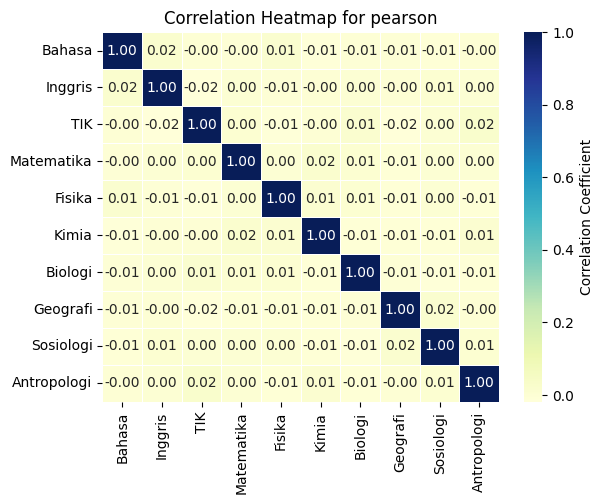

Correlation Matrix for kendall


,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi
Bahasa,1.000000,0.011318,-0.000416,-0.003127,0.009839,-0.008902,-0.004134,-0.003918,-0.006198,-0.001828
Inggris,0.011318,1.000000,-0.012830,0.001664,-0.003485,-0.000140,0.002989,-0.000516,0.005746,0.000968
TIK,-0.000416,-0.012830,1.000000,0.003329,-0.009929,-0.001913,0.009326,-0.011884,0.002793,0.016169
Matematika,-0.003127,0.001664,0.003329,1.000000,0.001180,0.012530,0.003876,-0.005212,0.001672,0.001453
Fisika,0.009839,-0.003485,-0.009929,0.001180,1.000000,0.007688,0.003244,-0.006073,0.001831,-0.006031
Kimia,-0.008902,-0.000140,-0.001913,0.012530,0.007688,1.000000,-0.005873,-0.005671,-0.007040,0.007947
Biologi,-0.004134,0.002989,0.009326,0.003876,0.003244,-0.005873,1.000000,-0.004261,-0.008053,-0.007506
Geografi,-0.003918,-0.000516,-0.011884,-0.005212,-0.006073,-0.005671,-0.004261,1.000000,0.010797,-0.001351
Sosiologi,-0.006198,0.005746,0.002793,0.001672,0.001831,-0.007040,-0.008053,0.010797,1.000000,0.005615
Antropologi,-0.001828,0.000968,0.016169,0.001453,-0.006031,0.007947,-0.007506,-0.001351,0.005615,1.000000


<AxesSubplot:title={'center':'Correlation Heatmap for kendall'}>

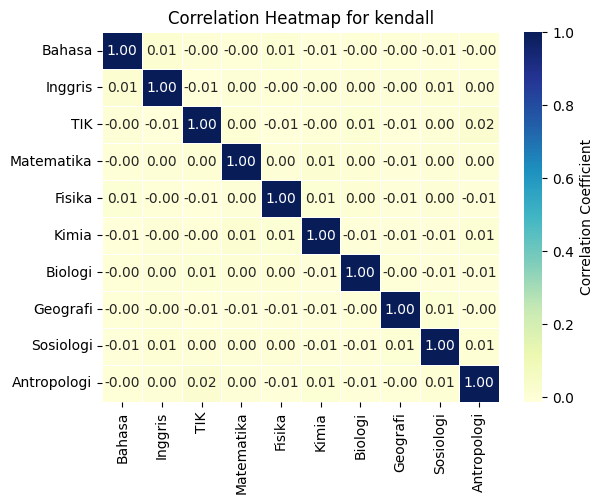

Correlation Matrix for spearman


,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi
Bahasa,1.000000,0.017029,-0.000720,-0.004642,0.014692,-0.013230,-0.006199,-0.005817,-0.009138,-0.002666
Inggris,0.017029,1.000000,-0.019109,0.002471,-0.005138,-0.000248,0.004545,-0.000742,0.008610,0.001452
TIK,-0.000720,-0.019109,1.000000,0.005066,-0.014858,-0.002789,0.014079,-0.017742,0.004230,0.024220
Matematika,-0.004642,0.002471,0.005066,1.000000,0.001775,0.018668,0.005834,-0.007794,0.002555,0.002057
Fisika,0.014692,-0.005138,-0.014858,0.001775,1.000000,0.011499,0.004930,-0.009094,0.002768,-0.009007
Kimia,-0.013230,-0.000248,-0.002789,0.018668,0.011499,1.000000,-0.008725,-0.008444,-0.010535,0.011931
Biologi,-0.006199,0.004545,0.014079,0.005834,0.004930,-0.008725,1.000000,-0.006394,-0.012029,-0.011073
Geografi,-0.005817,-0.000742,-0.017742,-0.007794,-0.009094,-0.008444,-0.006394,1.000000,0.016082,-0.002007
Sosiologi,-0.009138,0.008610,0.004230,0.002555,0.002768,-0.010535,-0.012029,0.016082,1.000000,0.008495
Antropologi,-0.002666,0.001452,0.024220,0.002057,-0.009007,0.011931,-0.011073,-0.002007,0.008495,1.000000


<AxesSubplot:title={'center':'Correlation Heatmap for spearman'}>

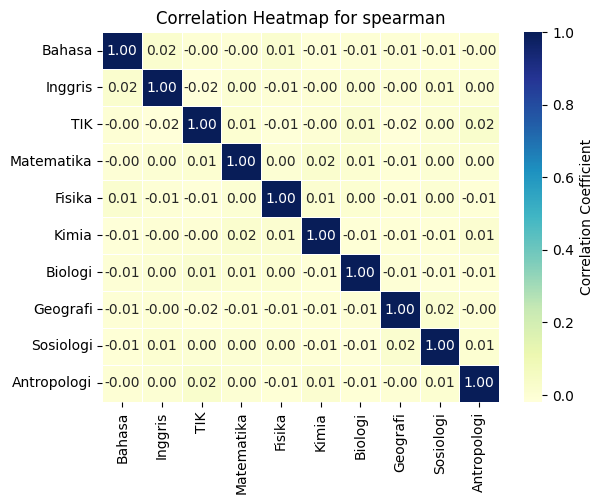

In [9]:
reload()
util_calculation.calculateCorrelationNumeric(df)


Correlation Matrix for phi_k


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

,Gender,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,Extra_Kurikuler,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas
Gender,1.000000,0.000000,0.000000,0.005185,0.018487,0.031771,0.020289,0.000000,0.000000,0.000000,0.000000,0.015348,0.000000,0.022248,0.000000,0.000000,0.031478,0.011712,0.000000,0.000000,0.011555
Bahasa,0.000000,1.000000,0.001830,0.029800,0.000000,0.000000,0.040738,0.000000,0.023599,0.020571,0.000000,0.000000,0.000000,0.008156,0.000000,0.000000,0.000000,0.012474,0.000000,0.000000,0.000000
Inggris,0.000000,0.001830,1.000000,0.000000,0.048316,0.000000,0.000000,0.000000,0.000000,0.000000,0.023484,0.000000,0.000000,0.000000,0.022693,0.000000,0.033205,0.005961,0.000000,0.000000,0.030765
TIK,0.005185,0.029800,0.000000,1.000000,0.034776,0.000000,0.038634,0.000000,0.024645,0.045358,0.000000,0.000000,0.000000,0.034498,0.014886,0.009641,0.018191,0.021771,0.000000,0.000000,0.000000
Matematika,0.018487,0.000000,0.048316,0.034776,1.000000,0.033798,0.022402,0.000000,0.030540,0.044339,0.025048,0.000000,0.000000,0.000000,0.003923,0.000000,0.000000,0.033907,0.000000,0.000000,0.044560
Fisika,0.031771,0.000000,0.000000,0.000000,0.033798,1.000000,0.020360,0.000000,0.028859,0.002241,0.000000,0.027776,0.000000,0.014187,0.020675,0.034509,0.000000,0.037505,0.016358,0.000000,0.000000
Kimia,0.020289,0.040738,0.000000,0.038634,0.022402,0.020360,1.000000,0.023342,0.030100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034404,0.022975,0.000000,0.000000,0.000000
Biologi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023342,1.000000,0.024904,0.000000,0.000000,0.034101,0.000000,0.024329,0.000000,0.000000,0.032966,0.020336,0.007576,0.027608,0.000000
Geografi,0.000000,0.023599,0.000000,0.024645,0.030540,0.028859,0.030100,0.024904,1.000000,0.031541,0.000000,0.000000,0.026194,0.034033,0.000000,0.000000,0.018455,0.034650,0.000000,0.000000,0.019041
Sosiologi,0.000000,0.020571,0.000000,0.045358,0.044339,0.002241,0.000000,0.000000,0.031541,1.000000,0.000000,0.015360,0.044326,0.000000,0.000000,0.000000,0.023572,0.024506,0.027282,0.024172,0.000000


<AxesSubplot:title={'center':'Correlation Heatmap for phi_k'}>

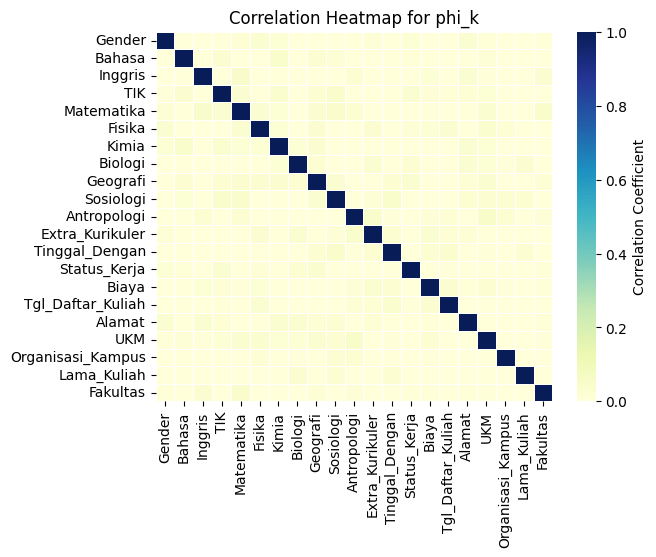

In [10]:
reload()
util_calculation.calculateCorrelationMix(df)

In [11]:
df[num_col].describe()

,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi
count,11499.000000,11499.000000,10932.00000,11499.000000,11499.000000,11499.000000,11499.000000,11499.000000,10928.000000,10823.000000
mean,74.350570,74.387599,74.23981,74.443534,74.352692,74.334820,74.349691,74.283755,74.217258,74.166682
std,8.229366,8.302509,8.20048,8.240524,8.264629,8.279217,8.259486,8.245244,8.225752,8.289890
min,60.100000,60.100000,60.10000,60.100000,60.100000,60.100000,60.100000,60.100000,60.100000,60.100000
25%,67.300000,67.200000,67.10000,67.400000,67.300000,67.200000,67.300000,67.100000,67.100000,66.900000
50%,74.200000,74.500000,74.20000,74.500000,74.400000,74.200000,74.300000,74.400000,74.200000,74.000000
75%,81.400000,81.600000,81.30000,81.600000,81.400000,81.500000,81.600000,81.350000,81.400000,81.400000
max,88.600000,88.600000,88.60000,88.600000,88.600000,88.600000,88.600000,88.600000,88.600000,88.600000


In [12]:
# lebih aman kalo di drop
df.dropna(inplace=True)
util_preprocessing.checkNullDataFrame(df)

,count,percent_missing
Gender,0,0.0
Extra_Kurikuler,0,0.0
Lama_Kuliah,0,0.0
Organisasi_Kampus,0,0.0
UKM,0,0.0
Alamat,0,0.0
Tgl_Daftar_Kuliah,0,0.0
Biaya,0,0.0
Status_Kerja,0,0.0
Tinggal_Dengan,0,0.0


## Encode

In [13]:
df

,Gender,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,Extra_Kurikuler,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas
0,Pria,69.8,64.6,64.0,81.5,88.2,86.7,68.3,74.0,67.7,70.7,Ekskul_4,Kos,Belum,Beasiswa,2008,Tangerang,UKM_3,Ya,"3,5",DKV
1,Wanita,68.7,88.3,80.9,80.7,67.8,67.3,72.1,77.3,64.4,62.8,Ekskul_4,Kosong,Belum,Kosong,2009,Bekasi,UKM_2,Tidak,4,FIKOM
2,Wanita,83.8,79.8,79.2,66.3,82.3,82.7,74.2,84.0,75.4,65.9,Ekskul_1,Kosong,Bekerja,Beasiswa,2008,Serang,UKM_4,Tidak,"4,5",FIKOM
3,Wanita,66.7,63.7,64.0,60.2,75.9,87.6,85.6,68.1,73.7,61.7,Ekskul_4,Orang Tua,Belum,Beasiswa,2009,Serang,UKM_1,Tidak,"5,5",DKV
4,Wanita,62.3,76.8,77.0,87.1,65.1,65.7,70.8,67.0,77.3,79.0,Ekskul_2,Orang Tua,Bekerja,Kosong,2009,Bekasi,Tidak,Ya,"6,5",DKV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11494,Pria,61.0,66.1,79.1,71.0,78.7,74.4,69.1,77.2,65.8,61.3,Ekskul_3,Orang Tua,Belum,Orang Tua,2009,Tangerang,UKM_3,Ya,"4,5",FIKOM
11495,Wanita,75.7,76.6,86.5,78.7,86.2,87.2,81.4,62.3,71.3,83.8,Ekskul_3,Kosong,Bekerja,Beasiswa,2008,Karawang,Tidak,Tidak,"3,5",DKV
11496,Wanita,85.7,61.0,82.7,77.6,78.7,76.3,82.2,68.6,76.5,70.9,Ekskul_2,Kos,Bekerja,Beasiswa,2007,Bogor,UKM_2,Ya,5,FT
11497,Wanita,84.8,67.5,84.6,73.6,74.6,61.6,80.3,83.4,76.4,76.6,Ekskul_2,Kos,Bekerja,Kosong,2007,Karawang,UKM_4,Tidak,"4,5",DKV


In [14]:
cat_col=util_preprocessing.getOnlyColmnsWithType(df, 'object')
num_col=util_preprocessing.getOnlyColmnsWithType(df, 'number')

encodedDf,scaler=util_preprocessing.normalizeNumericColumn(df,num_col)
encodedDf,labelEncoder=util_preprocessing.encodeCategoricalColumn(df,cat_col)
encodedDf

,Gender,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,Extra_Kurikuler,Tinggal_Dengan,Status_Kerja,Biaya,Tgl_Daftar_Kuliah,Alamat,UKM,Organisasi_Kampus,Lama_Kuliah,Fakultas
0,0,0.340351,0.157895,0.136842,0.750877,0.985965,0.933333,0.287719,0.487719,0.266667,0.371930,3,0,1,0,1,5,3,1,0,0
1,1,0.301754,0.989474,0.729825,0.722807,0.270175,0.252632,0.421053,0.603509,0.150877,0.094737,3,1,1,1,2,0,2,0,1,1
2,1,0.831579,0.691228,0.670175,0.217544,0.778947,0.792982,0.494737,0.838596,0.536842,0.203509,0,1,0,0,1,4,4,0,2,1
3,1,0.231579,0.126316,0.136842,0.003509,0.554386,0.964912,0.894737,0.280702,0.477193,0.056140,3,2,1,0,2,4,1,0,4,0
4,1,0.077193,0.585965,0.592982,0.947368,0.175439,0.196491,0.375439,0.242105,0.603509,0.663158,1,2,0,1,2,0,0,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11494,0,0.031579,0.210526,0.666667,0.382456,0.652632,0.501754,0.315789,0.600000,0.200000,0.042105,2,2,1,2,2,5,3,1,2,1
11495,1,0.547368,0.578947,0.926316,0.652632,0.915789,0.950877,0.747368,0.077193,0.392982,0.831579,2,1,0,0,1,3,0,0,0,0
11496,1,0.898246,0.031579,0.792982,0.614035,0.652632,0.568421,0.775439,0.298246,0.575439,0.378947,1,0,0,0,0,1,2,1,3,3
11497,1,0.866667,0.259649,0.859649,0.473684,0.508772,0.052632,0.708772,0.817544,0.571930,0.578947,1,0,0,1,0,3,4,0,2,0


In [16]:
x=encodedDf[test_columns]
y=encodedDf['Fakultas']

In [17]:
model=util_modelling.prepareKNN()
model


KNeighborsClassifier()

In [20]:
x

,Gender,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,Extra_Kurikuler,Tinggal_Dengan,Status_Kerja,Biaya
0,0,0.340351,0.157895,0.136842,0.750877,0.985965,0.933333,0.287719,0.487719,0.266667,0.371930,3,0,1,0
1,1,0.301754,0.989474,0.729825,0.722807,0.270175,0.252632,0.421053,0.603509,0.150877,0.094737,3,1,1,1
2,1,0.831579,0.691228,0.670175,0.217544,0.778947,0.792982,0.494737,0.838596,0.536842,0.203509,0,1,0,0
3,1,0.231579,0.126316,0.136842,0.003509,0.554386,0.964912,0.894737,0.280702,0.477193,0.056140,3,2,1,0
4,1,0.077193,0.585965,0.592982,0.947368,0.175439,0.196491,0.375439,0.242105,0.603509,0.663158,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11494,0,0.031579,0.210526,0.666667,0.382456,0.652632,0.501754,0.315789,0.600000,0.200000,0.042105,2,2,1,2
11495,1,0.547368,0.578947,0.926316,0.652632,0.915789,0.950877,0.747368,0.077193,0.392982,0.831579,2,1,0,0
11496,1,0.898246,0.031579,0.792982,0.614035,0.652632,0.568421,0.775439,0.298246,0.575439,0.378947,1,0,0,0
11497,1,0.866667,0.259649,0.859649,0.473684,0.508772,0.052632,0.708772,0.817544,0.571930,0.578947,1,0,0,1


In [24]:
reload()
util_modelling.getStratifedKFoldScore([model],x.values,y.values)

d:\tools\miniconda\envs\lombaDAC\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

d:\tools\miniconda\envs\lombaDAC\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

,model_name,accuracy,recall,precision,f1
0,KNeighborsClassifier,0.19761,0.19761,0.19761,0.19761


In [34]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn

parameters_KNN = {
    'n_neighbors': (1,100, 5),
    'leaf_size': (20,60,5),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),
}



model=sklearn.model_selection.GridSearchCV(KNeighborsClassifier(),param_grid=parameters_KNN,scoring = 'accuracy', n_jobs = -1,cv = 10)

In [35]:
model.fit(x.values,y.values)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': (20, 60, 5),
                         'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': (1, 100, 5), 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [39]:
model.best_params_ 

{'leaf_size': 60,
 'metric': 'chebyshev',
 'n_neighbors': 5,
 'p': 1,
 'weights': 'distance'}

In [38]:
model.best_score_

0.20506714626794587

In [41]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=.5,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:17<00:00,  1.65it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreeClassifier,0.21,0.21,None,0.21,0.02
AdaBoostClassifier,0.21,0.21,None,0.21,0.34
LabelSpreading,0.21,0.21,None,0.21,1.69
LabelPropagation,0.21,0.21,None,0.21,1.27
Perceptron,0.21,0.21,None,0.19,0.02
PassiveAggressiveClassifier,0.20,0.20,None,0.20,0.04
DecisionTreeClassifier,0.20,0.20,None,0.20,0.07
ExtraTreesClassifier,0.20,0.20,None,0.20,0.61
BaggingClassifier,0.20,0.20,None,0.20,0.35
